In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [7]:
df = pd.read_csv('../data/cleaned_food_affordability_data.csv')
df_na = df[df['Country'].isin(['Canada', 'United States', 'Mexico'])].copy()

print(f"✓ North America dataset loaded successfully!")
print(f"Shape: {df_na.shape}")
print(f"Countries: {df_na['Country'].unique()}")
print(f"Year range: {df_na['Year'].min()} - {df_na['Year'].max()}")

display(df_na)

✓ North America dataset loaded successfully!
Shape: (24, 3)
Countries: ['Canada' 'Mexico' 'United States']
Year range: 2017 - 2024


,Country,Year,Cannot_Afford_Healthy_Diet_Pct
0,Canada,2017,3.20
1,Canada,2018,2.70
2,Canada,2019,2.70
3,Canada,2020,3.20
4,Canada,2021,3.00
5,Canada,2022,2.70
6,Canada,2023,3.00
7,Canada,2024,3.00
8,Mexico,2017,28.30
9,Mexico,2018,27.00


In [9]:
print("\nSummary Statistics by Country:")
summary = df_na.groupby('Country')['Cannot_Afford_Healthy_Diet_Pct'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max', 'var'
]).round(2)
display(summary)

# Pivot for easier time series analysis
df_pivot = df_na.pivot(index='Year', columns='Country', values='Cannot_Afford_Healthy_Diet_Pct')
print("\nTime Series Data (Wide Format):")
display(df_pivot)


Summary Statistics by Country:


,count,mean,median,std,min,max,var
Country,,,,,,,
Canada,8,2.94,3.00,0.21,2.70,3.20,0.05
Mexico,8,24.92,24.85,3.08,21.40,29.30,9.48
United States,8,4.19,4.60,0.88,2.50,5.00,0.77



Time Series Data (Wide Format):


Country,Canada,Mexico,United States
Year,,,
2017,3.20,28.30,5.00
2018,2.70,27.00,4.70
2019,2.70,25.00,4.20
2020,3.20,29.30,3.20
2021,3.00,24.70,2.50
2022,2.70,22.10,4.70
2023,3.00,21.60,4.70
2024,3.00,21.40,4.50


TIME SERIES OVERVIEW

Summary Statistics by Country:


,count,mean,median,std,min,max,var
Country,,,,,,,
Canada,8,2.94,3.00,0.21,2.70,3.20,0.05
Mexico,8,24.92,24.85,3.08,21.40,29.30,9.48
United States,8,4.19,4.60,0.88,2.50,5.00,0.77



Time Series Data (Wide Format):


Country,Canada,Mexico,United States
Year,,,
2017,3.20,28.30,5.00
2018,2.70,27.00,4.70
2019,2.70,25.00,4.20
2020,3.20,29.30,3.20
2021,3.00,24.70,2.50
2022,2.70,22.10,4.70
2023,3.00,21.60,4.70
2024,3.00,21.40,4.50


Creating comprehensive time series visualization...


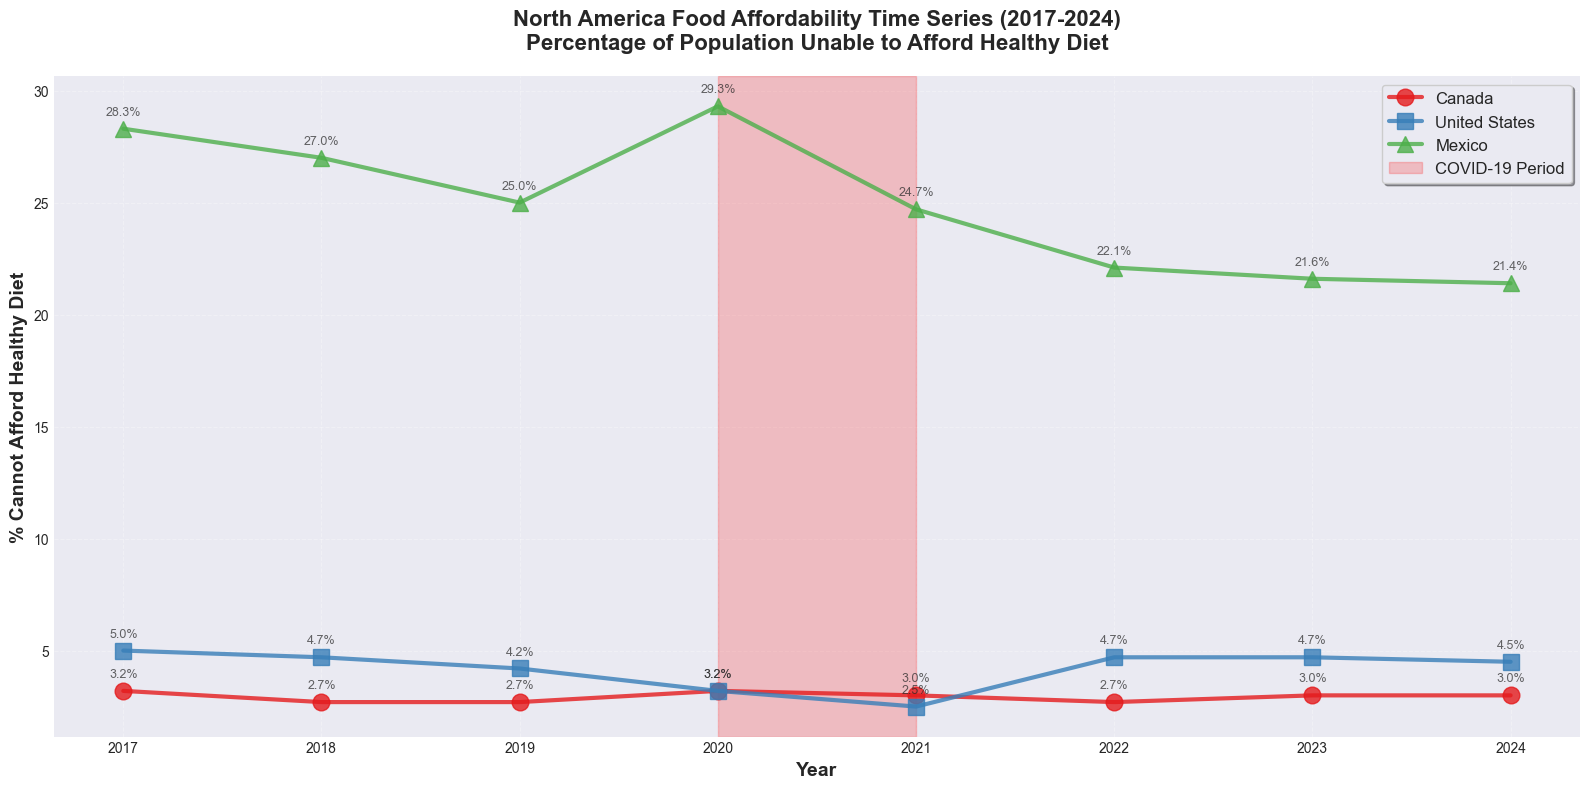

In [10]:
print("=" * 80)
print("TIME SERIES OVERVIEW")
print("=" * 80)

# Summary by country
print("\nSummary Statistics by Country:")
summary = df_na.groupby('Country')['Cannot_Afford_Healthy_Diet_Pct'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max', 'var'
]).round(2)
display(summary)

# Pivot for easier time series analysis
df_pivot = df_na.pivot(index='Year', columns='Country', values='Cannot_Afford_Healthy_Diet_Pct')
print("\nTime Series Data (Wide Format):")
display(df_pivot)


# CELL 4: Time Series Visualization - Main Trend Plot
# ============================================================================
print("Creating comprehensive time series visualization...")

fig, ax = plt.subplots(figsize=(16, 8))

colors = {'Canada': '#E41A1C', 'United States': '#377EB8', 'Mexico': '#4DAF4A'}
markers = {'Canada': 'o', 'United States': 's', 'Mexico': '^'}

# Plot each country
for country in ['Canada', 'United States', 'Mexico']:
    country_data = df_na[df_na['Country'] == country]
    ax.plot(country_data['Year'], 
            country_data['Cannot_Afford_Healthy_Diet_Pct'],
            marker=markers[country],
            color=colors[country],
            linewidth=3,
            markersize=12,
            label=country,
            alpha=0.8)
    
    # Add value labels
    for _, row in country_data.iterrows():
        ax.annotate(f'{row["Cannot_Afford_Healthy_Diet_Pct"]:.1f}%',
                   (row['Year'], row['Cannot_Afford_Healthy_Diet_Pct']),
                   textcoords="offset points",
                   xytext=(0, 10),
                   ha='center',
                   fontsize=9,
                   alpha=0.7)

# Highlight COVID-19 period
ax.axvspan(2020, 2021, alpha=0.2, color='red', label='COVID-19 Period')

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('% Cannot Afford Healthy Diet', fontsize=14, fontweight='bold')
ax.set_title('North America Food Affordability Time Series (2017-2024)\nPercentage of Population Unable to Afford Healthy Diet', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='best', frameon=True, shadow=True, fancybox=True)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xticks(df_na['Year'].unique())

plt.tight_layout()
plt.show()


CANADA - Trend Analysis:
  Slope: -0.0012 (% change per year)
  Intercept: 5.34
  R²: 0.0002
  → IMPROVING trend (0.001% decrease per year)
  → Weak linear trend

UNITED STATES - Trend Analysis:
  Slope: -0.0321 (% change per year)
  Intercept: 69.13
  R²: 0.0081
  → IMPROVING trend (0.032% decrease per year)
  → Weak linear trend

MEXICO - Trend Analysis:
  Slope: -1.0548 (% change per year)
  Intercept: 2156.07
  R²: 0.7042
  → IMPROVING trend (1.055% decrease per year)
  → Strong linear trend (R² > 0.7)


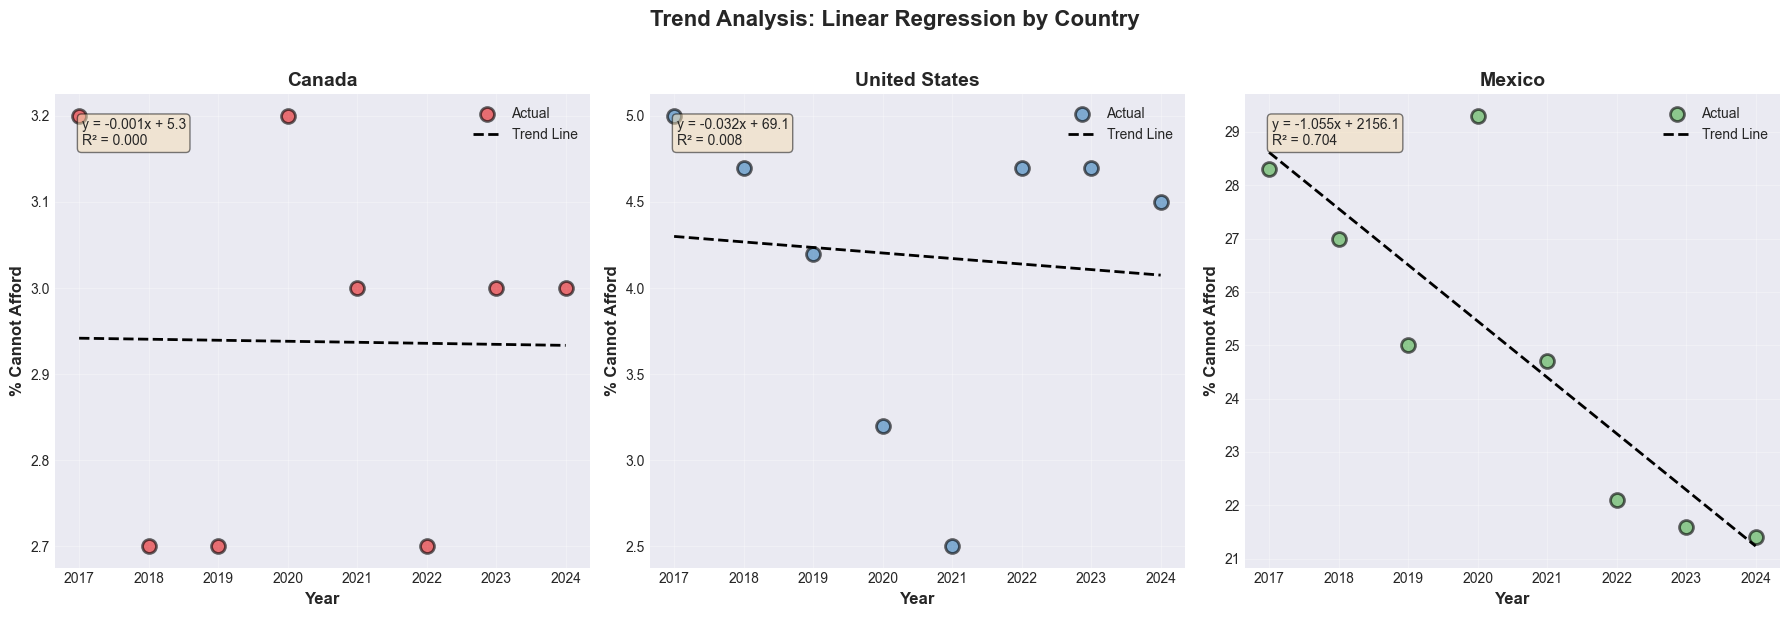

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, country in enumerate(['Canada', 'United States', 'Mexico']):
    country_data = df_na[df_na['Country'] == country].copy()
    
    # Prepare data for regression
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Cannot_Afford_Healthy_Diet_Pct'].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate metrics
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)
    
    # Plot
    axes[idx].scatter(country_data['Year'], y, 
                     color=colors[country], s=100, alpha=0.6, 
                     edgecolors='black', linewidth=2, label='Actual')
    axes[idx].plot(country_data['Year'], y_pred, 
                   color='black', linewidth=2, linestyle='--', 
                   label=f'Trend Line')
    
    axes[idx].set_xlabel('Year', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('% Cannot Afford', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{country}', fontsize=14, fontweight='bold')
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    
    # Add regression equation and R²
    equation = f'y = {slope:.3f}x + {intercept:.1f}\nR² = {r2:.3f}'
    axes[idx].text(0.05, 0.95, equation, 
                  transform=axes[idx].transAxes,
                  fontsize=10, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Print results
    print(f"\n{country.upper()} - Trend Analysis:")
    print(f"  Slope: {slope:.4f} (% change per year)")
    print(f"  Intercept: {intercept:.2f}")
    print(f"  R²: {r2:.4f}")
    
    if slope < 0:
        print(f"  → IMPROVING trend ({abs(slope):.3f}% decrease per year)")
    elif slope > 0:
        print(f"  → WORSENING trend ({slope:.3f}% increase per year)")
    else:
        print(f"  → STABLE trend")
    
    if r2 > 0.7:
        print(f"  → Strong linear trend (R² > 0.7)")
    elif r2 > 0.4:
        print(f"  → Moderate linear trend")
    else:
        print(f"  → Weak linear trend")

plt.suptitle('Trend Analysis: Linear Regression by Country', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


Absolute YoY Changes (percentage points):


Country,Canada,Mexico,United States
Year,,,
2017,NaN,NaN,NaN
2018,-0.50,-1.30,-0.30
2019,0.00,-2.00,-0.50
2020,0.50,4.30,-1.00
2021,-0.20,-4.60,-0.70
2022,-0.30,-2.60,2.20
2023,0.30,-0.50,0.00
2024,0.00,-0.20,-0.20



Percentage YoY Changes (%):


Country,Canada,Mexico,United States
Year,,,
2017,NaN,NaN,NaN
2018,-15.62,-4.59,-6.00
2019,0.00,-7.41,-10.64
2020,18.52,17.20,-23.81
2021,-6.25,-15.70,-21.88
2022,-10.00,-10.53,88.00
2023,11.11,-2.26,0.00
2024,0.00,-0.93,-4.26


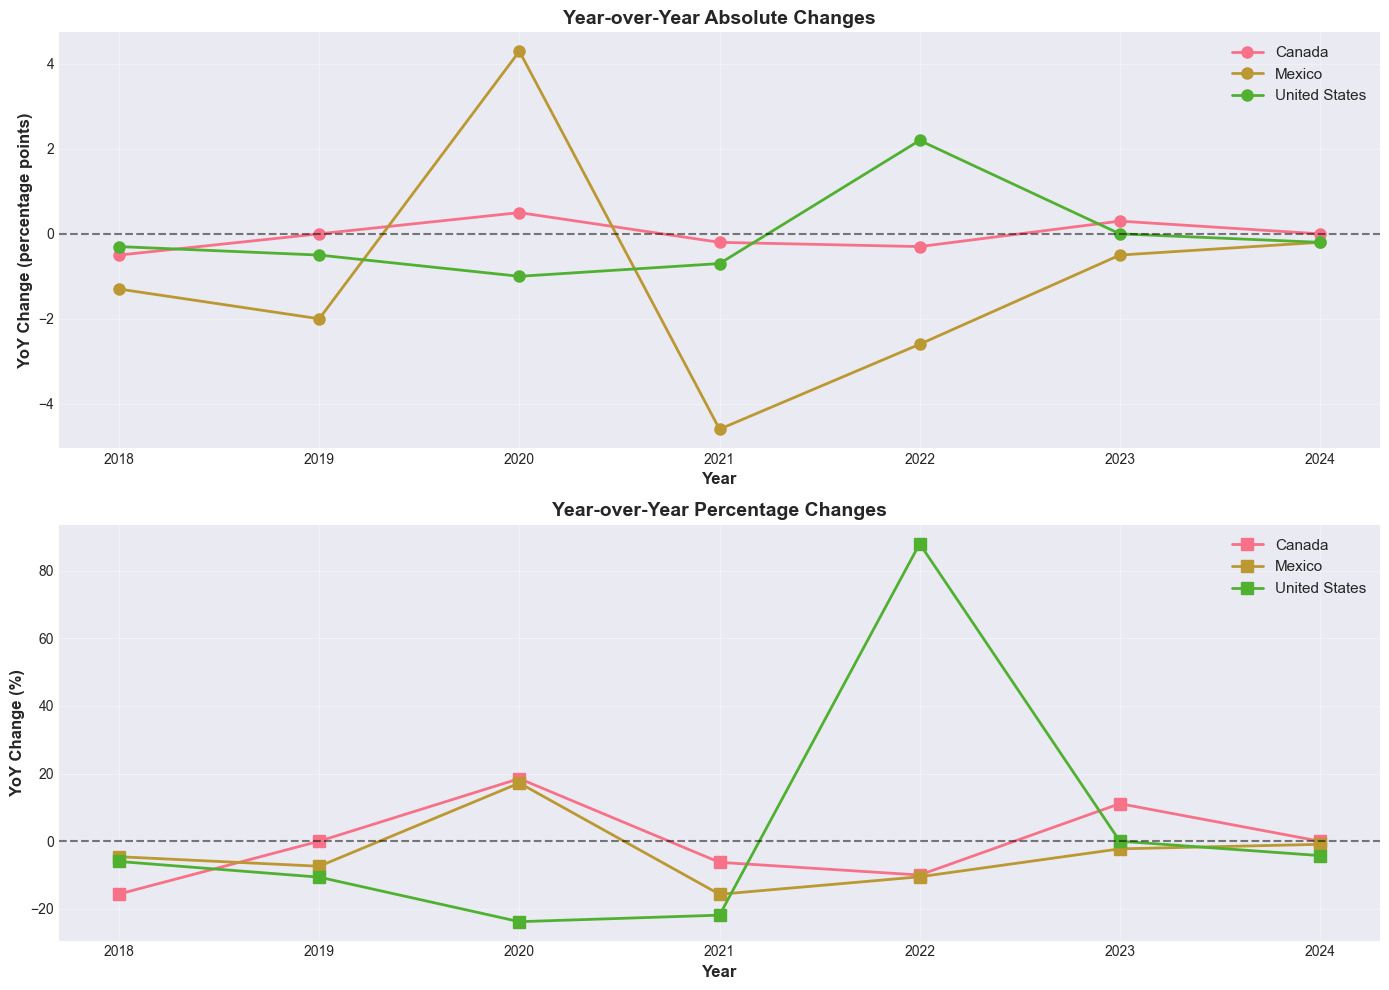


Largest YoY Changes:

Canada:
  Largest increase: 0.50% points in 2020
  Largest decrease: -0.50% points in 2018

Mexico:
  Largest increase: 4.30% points in 2020
  Largest decrease: -4.60% points in 2021

United States:
  Largest increase: 2.20% points in 2022
  Largest decrease: -1.00% points in 2020


In [12]:
# Calculate YoY changes
df_yoy = df_pivot.copy()
df_yoy_change = df_yoy.diff()
df_yoy_pct_change = df_yoy.pct_change() * 100

print("\nAbsolute YoY Changes (percentage points):")
display(df_yoy_change.round(2))

print("\nPercentage YoY Changes (%):")
display(df_yoy_pct_change.round(2))

# Visualize YoY changes
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Absolute changes
for country in df_yoy_change.columns:
    axes[0].plot(df_yoy_change.index, df_yoy_change[country], 
                marker='o', linewidth=2, markersize=8, label=country)

axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('YoY Change (percentage points)', fontsize=12, fontweight='bold')
axes[0].set_title('Year-over-Year Absolute Changes', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Percentage changes
for country in df_yoy_pct_change.columns:
    axes[1].plot(df_yoy_pct_change.index, df_yoy_pct_change[country], 
                marker='s', linewidth=2, markersize=8, label=country)

axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('YoY Change (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Year-over-Year Percentage Changes', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify largest changes
print("\nLargest YoY Changes:")
for country in df_yoy_change.columns:
    max_increase_year = df_yoy_change[country].idxmax()
    max_increase_val = df_yoy_change[country].max()
    max_decrease_year = df_yoy_change[country].idxmin()
    max_decrease_val = df_yoy_change[country].min()
    
    print(f"\n{country}:")
    print(f"  Largest increase: {max_increase_val:.2f}% points in {max_increase_year}")
    print(f"  Largest decrease: {max_decrease_val:.2f}% points in {max_decrease_year}")


Cumulative Changes from 2017 Baseline:


Country,Canada,Mexico,United States
Year,,,
2017,0.00,0.00,0.00
2018,-0.50,-1.30,-0.30
2019,-0.50,-3.30,-0.80
2020,0.00,1.00,-1.80
2021,-0.20,-3.60,-2.50
2022,-0.50,-6.20,-0.30
2023,-0.20,-6.70,-0.30
2024,-0.20,-6.90,-0.50


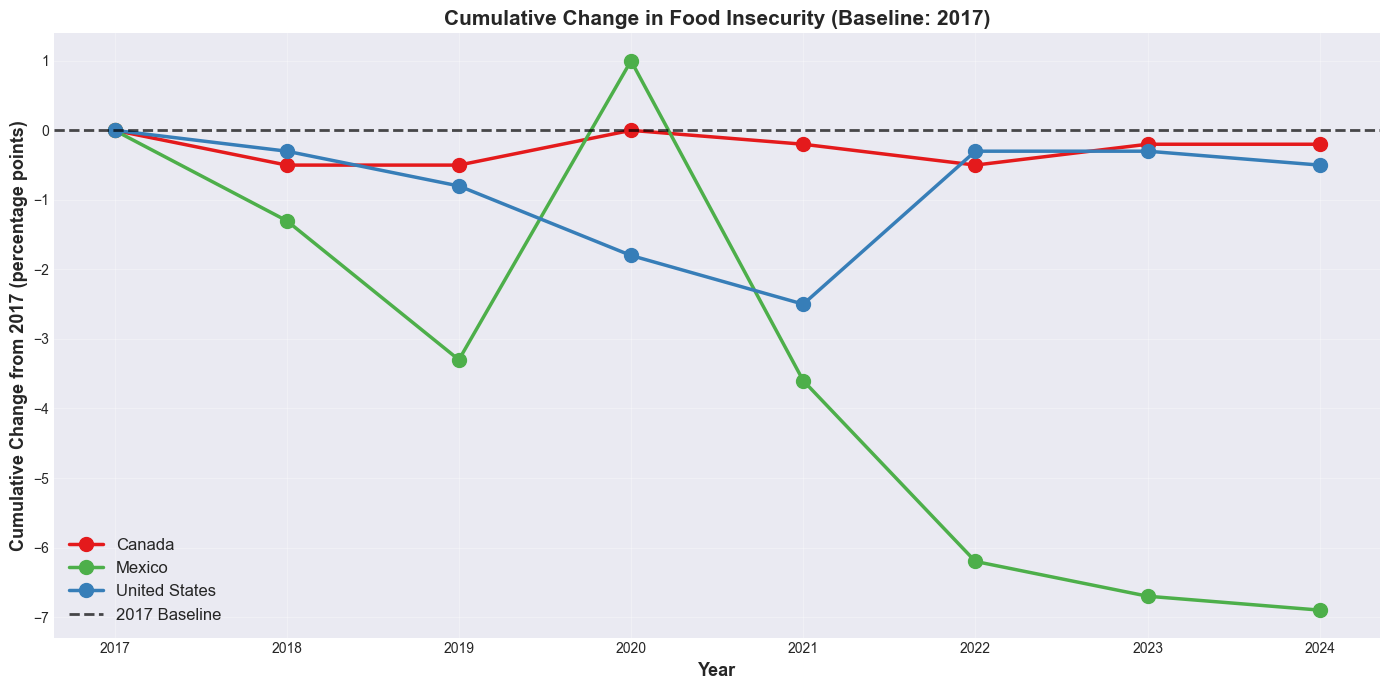

In [13]:
# Calculate cumulative changes from 2017 baseline
baseline_year = 2017
df_cumulative = df_pivot.copy()
baseline = df_cumulative.loc[baseline_year]

for col in df_cumulative.columns:
    df_cumulative[col] = df_cumulative[col] - baseline[col]

print(f"\nCumulative Changes from {baseline_year} Baseline:")
display(df_cumulative.round(2))

# Visualize cumulative changes
plt.figure(figsize=(14, 7))

for country in df_cumulative.columns:
    plt.plot(df_cumulative.index, df_cumulative[country], 
            marker='o', linewidth=2.5, markersize=10, label=country,
            color=colors[country])

plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.7, label='2017 Baseline')
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Cumulative Change from 2017 (percentage points)', fontsize=13, fontweight='bold')
plt.title('Cumulative Change in Food Insecurity (Baseline: 2017)', fontsize=15, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
print("\nCumulative Change Summary (2017 → 2024):")
for country in df_cumulative.columns:
    total_change = df_cumulative.loc[2024, country]
    print(f"{country}: {total_change:+.2f} percentage points")


Cumulative Change Summary (2017 → 2024):
Canada: -0.20 percentage points
Mexico: -6.90 percentage points
United States: -0.50 percentage points



3-Year Moving Average:


Country,Canada,Mexico,United States
Year,,,
2017,NaN,NaN,NaN
2018,2.87,26.77,4.63
2019,2.87,27.10,4.03
2020,2.97,26.33,3.30
2021,2.97,25.37,3.47
2022,2.90,22.80,3.97
2023,2.90,21.70,4.63
2024,NaN,NaN,NaN


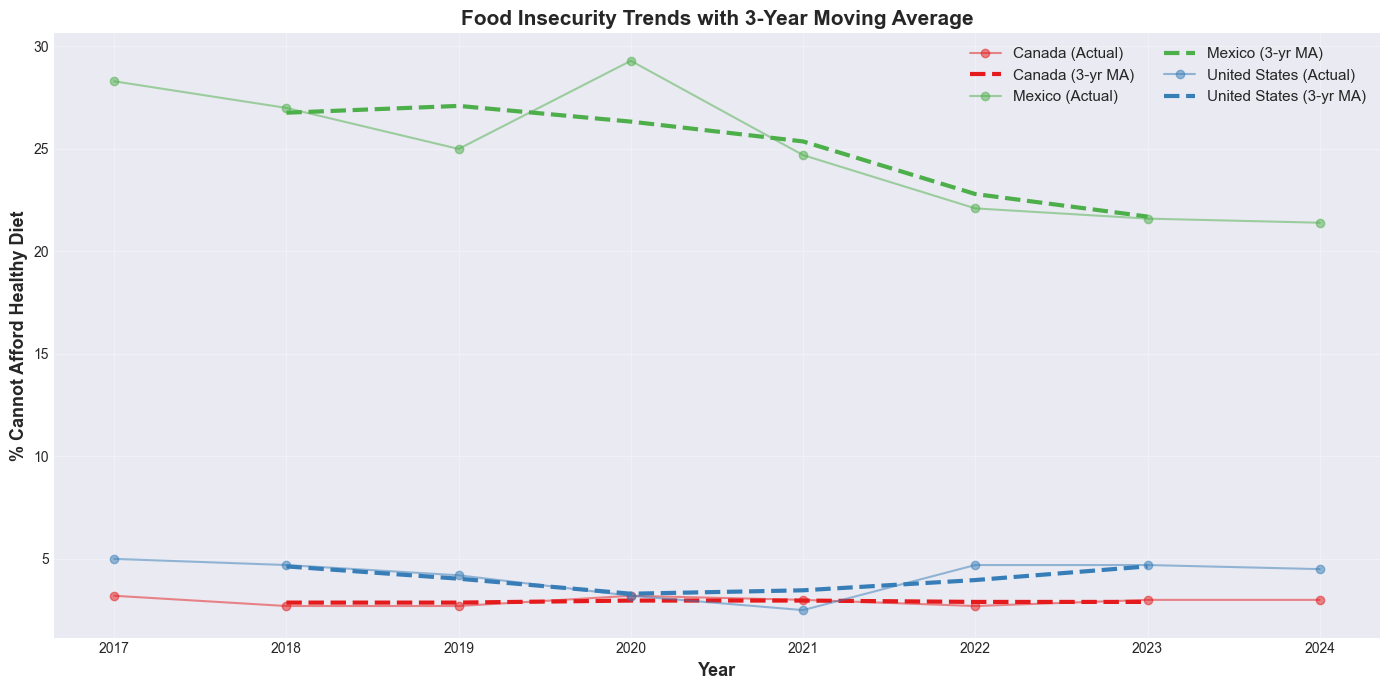

In [15]:
# Calculate 3-year moving average
window = 3
df_ma = df_pivot.rolling(window=window, center=True).mean()

print(f"\n{window}-Year Moving Average:")
display(df_ma.round(2))

# Visualize with moving average
plt.figure(figsize=(14, 7))

for country in df_pivot.columns:
    # Original data
    plt.plot(df_pivot.index, df_pivot[country], 
            marker='o', linewidth=1.5, markersize=6, 
            label=f'{country} (Actual)', alpha=0.5,
            color=colors[country])
    
    # Moving average
    plt.plot(df_ma.index, df_ma[country], 
            linewidth=3, linestyle='--',
            label=f'{country} ({window}-yr MA)',
            color=colors[country])

plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('% Cannot Afford Healthy Diet', fontsize=13, fontweight='bold')
plt.title(f'Food Insecurity Trends with {window}-Year Moving Average', fontsize=15, fontweight='bold')
plt.legend(fontsize=11, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Rolling 3-Year Standard Deviation:


Country,Canada,Mexico,United States
Year,,,
2017,NaN,NaN,NaN
2018,NaN,NaN,NaN
2019,0.29,1.66,0.40
2020,0.29,2.15,0.76
2021,0.25,2.57,0.85
2022,0.25,3.65,1.12
2023,0.17,1.66,1.27
2024,0.17,0.36,0.12



Overall Volatility (Standard Deviation across all years):


Country
Canada          0.21
Mexico          3.08
United States   0.88
dtype: float64


Coefficient of Variation (CV = Std/Mean * 100):


Country
Canada           7.26
Mexico          12.35
United States   20.91
dtype: float64

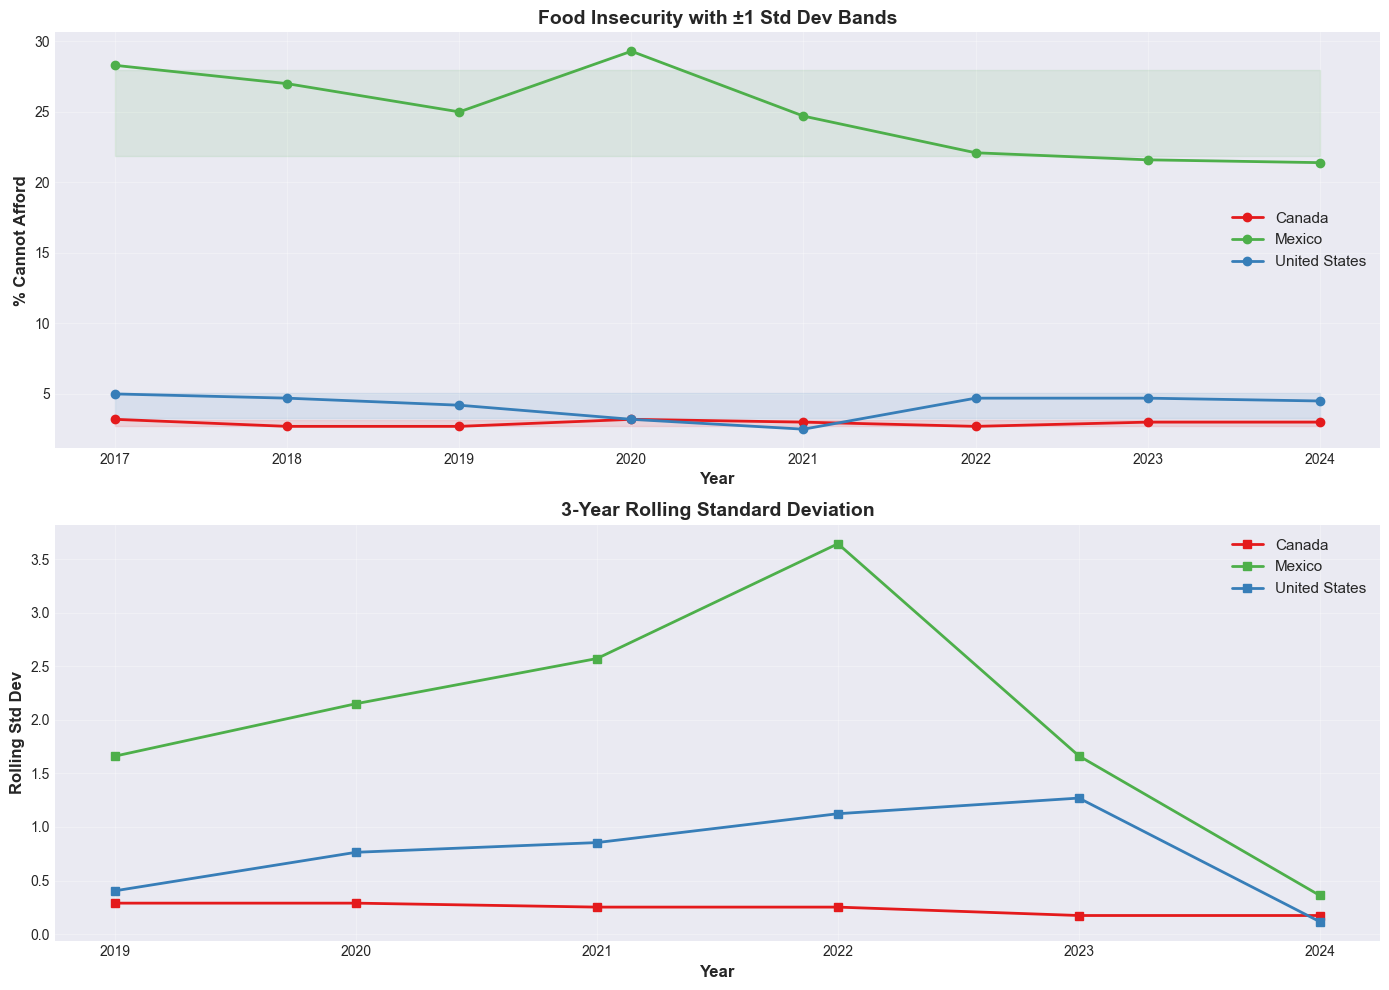


Volatility Ranking (Most to Least Volatile):
1. Mexico: 3.079 (CV: 12.35%)
2. United States: 0.876 (CV: 20.91%)
3. Canada: 0.213 (CV: 7.26%)


In [16]:
# Calculate rolling standard deviation
window = 3
df_rolling_std = df_pivot.rolling(window=window).std()

print(f"\nRolling {window}-Year Standard Deviation:")
display(df_rolling_std.round(3))

# Overall volatility
print("\nOverall Volatility (Standard Deviation across all years):")
overall_volatility = df_pivot.std()
display(overall_volatility.round(3))

# Coefficient of Variation (CV)
cv = (df_pivot.std() / df_pivot.mean() * 100).round(2)
print("\nCoefficient of Variation (CV = Std/Mean * 100):")
display(cv)

# Visualize volatility
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Original data with volatility bands
for country in df_pivot.columns:
    mean = df_pivot[country].mean()
    std = df_pivot[country].std()
    
    axes[0].plot(df_pivot.index, df_pivot[country], 
                marker='o', linewidth=2, label=country,
                color=colors[country])
    axes[0].fill_between(df_pivot.index, mean - std, mean + std, 
                        alpha=0.1, color=colors[country])

axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('% Cannot Afford', fontsize=12, fontweight='bold')
axes[0].set_title('Food Insecurity with ±1 Std Dev Bands', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Rolling standard deviation
for country in df_rolling_std.columns:
    axes[1].plot(df_rolling_std.index, df_rolling_std[country], 
                marker='s', linewidth=2, label=country,
                color=colors[country])

axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Rolling Std Dev', fontsize=12, fontweight='bold')
axes[1].set_title(f'{window}-Year Rolling Standard Deviation', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVolatility Ranking (Most to Least Volatile):")
volatility_rank = overall_volatility.sort_values(ascending=False)
for i, (country, vol) in enumerate(volatility_rank.items(), 1):
    print(f"{i}. {country}: {vol:.3f} (CV: {cv[country]:.2f}%)")


Correlation Matrix:


Country,Canada,Mexico,United States
Country,,,
Canada,1.00,0.38,-0.27
Mexico,0.38,1.00,-0.23
United States,-0.27,-0.23,1.00


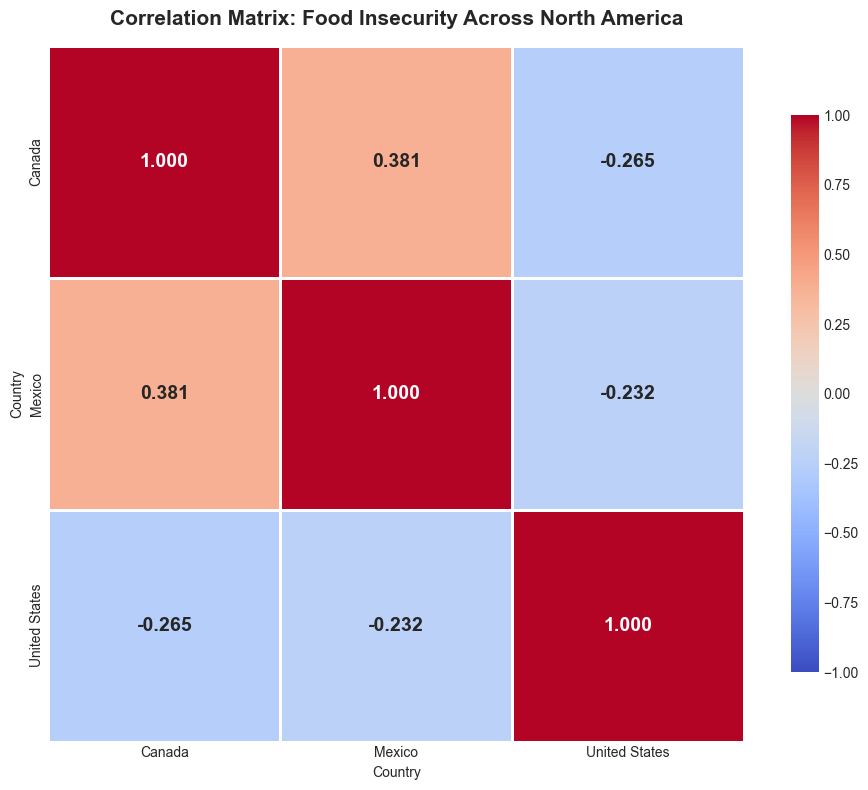


Correlation Significance Tests:
Canada vs Mexico:
  Correlation: 0.381 
  P-value: 0.3517
  → Not statistically significant

Canada vs United States:
  Correlation: -0.265 
  P-value: 0.5264
  → Not statistically significant

Mexico vs United States:
  Correlation: -0.232 
  P-value: 0.5796
  → Not statistically significant



In [17]:
# Calculate correlation matrix
corr_matrix = df_pivot.corr()

print("\nCorrelation Matrix:")
display(corr_matrix.round(3))

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1,
            annot_kws={'size': 14, 'weight': 'bold'})
plt.title('Correlation Matrix: Food Insecurity Across North America', 
          fontsize=15, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Statistical significance of correlations
print("\nCorrelation Significance Tests:")
countries = df_pivot.columns.tolist()
for i in range(len(countries)):
    for j in range(i+1, len(countries)):
        country1, country2 = countries[i], countries[j]
        corr, p_value = pearsonr(df_pivot[country1], df_pivot[country2])
        significance = "***" if p_value < 0.01 else "**" if p_value < 0.05 else "*" if p_value < 0.1 else ""
        print(f"{country1} vs {country2}:")
        print(f"  Correlation: {corr:.3f} {significance}")
        print(f"  P-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"  → Statistically significant (p < 0.05)")
        else:
            print(f"  → Not statistically significant")
        print()


Food Insecurity Around COVID-19:


Country,Canada,Mexico,United States
Year,,,
2019,2.70,25.00,4.20
2020,3.20,29.30,3.20
2021,3.00,24.70,2.50



Changes During COVID Period:

Canada:
  2019 → 2020: +0.50% points
  2020 → 2021: -0.20% points
  Total (2019 → 2021): +0.30% points

Mexico:
  2019 → 2020: +4.30% points
  2020 → 2021: -4.60% points
  Total (2019 → 2021): -0.30% points

United States:
  2019 → 2020: -1.00% points
  2020 → 2021: -0.70% points
  Total (2019 → 2021): -1.70% points


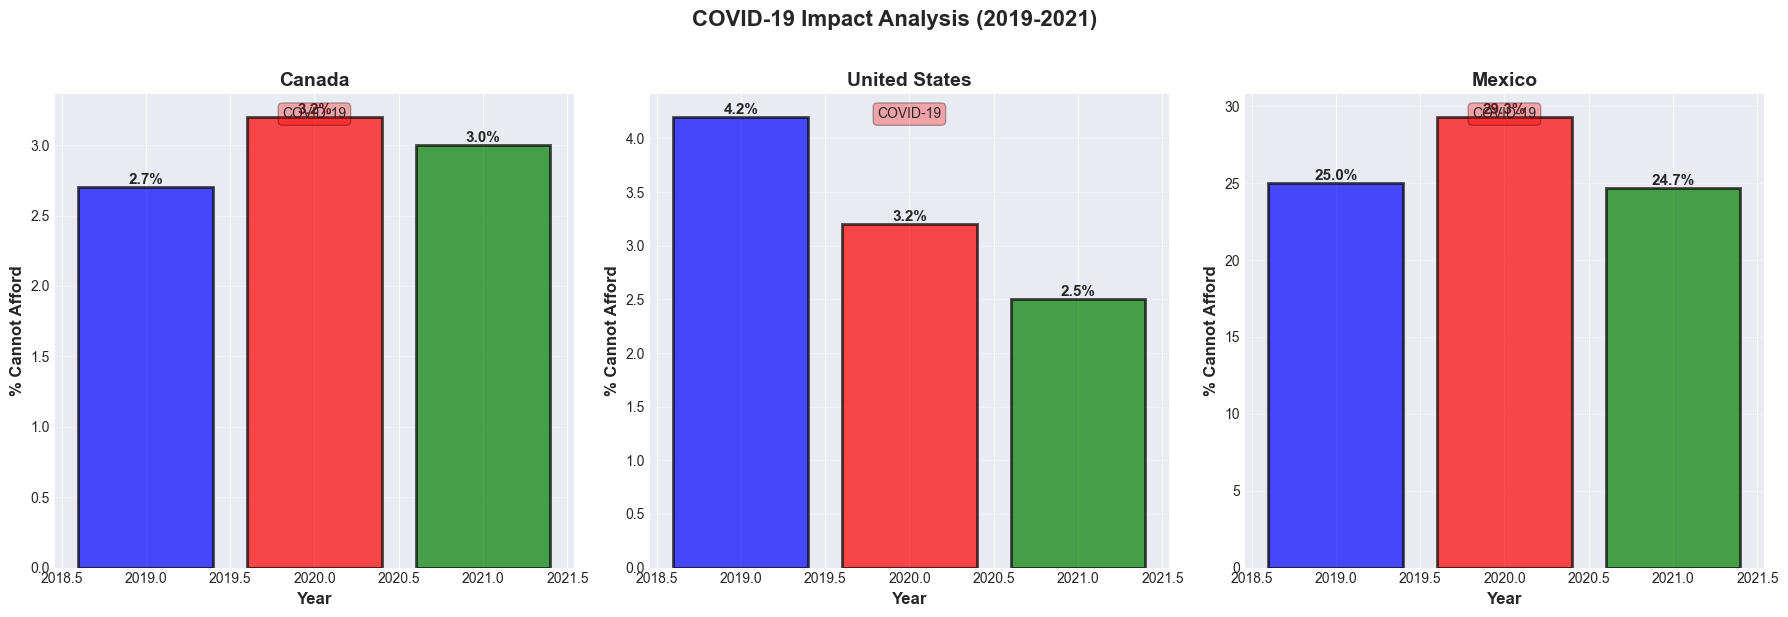

In [18]:
# Compare pre-COVID (2019) vs COVID (2020) vs post-COVID (2021)
covid_years = df_na[df_na['Year'].isin([2019, 2020, 2021])]
covid_pivot = covid_years.pivot(index='Year', columns='Country', values='Cannot_Afford_Healthy_Diet_Pct')

print("\nFood Insecurity Around COVID-19:")
display(covid_pivot)

# Calculate changes
print("\nChanges During COVID Period:")
for country in covid_pivot.columns:
    change_2019_2020 = covid_pivot.loc[2020, country] - covid_pivot.loc[2019, country]
    change_2020_2021 = covid_pivot.loc[2021, country] - covid_pivot.loc[2020, country]
    total_change = covid_pivot.loc[2021, country] - covid_pivot.loc[2019, country]
    
    print(f"\n{country}:")
    print(f"  2019 → 2020: {change_2019_2020:+.2f}% points")
    print(f"  2020 → 2021: {change_2020_2021:+.2f}% points")
    print(f"  Total (2019 → 2021): {total_change:+.2f}% points")

# Visualize COVID impact
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, country in enumerate(['Canada', 'United States', 'Mexico']):
    country_covid = covid_years[covid_years['Country'] == country]
    
    bars = axes[idx].bar(country_covid['Year'], 
                        country_covid['Cannot_Afford_Healthy_Diet_Pct'],
                        color=['blue', 'red', 'green'],
                        alpha=0.7,
                        edgecolor='black',
                        linewidth=2)
    
    axes[idx].set_xlabel('Year', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('% Cannot Afford', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{country}', fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.1f}%',
                      ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Add COVID marker
    axes[idx].text(2020, axes[idx].get_ylim()[1] * 0.95, 'COVID-19', 
                  ha='center', fontsize=10, 
                  bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

plt.suptitle('COVID-19 Impact Analysis (2019-2021)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

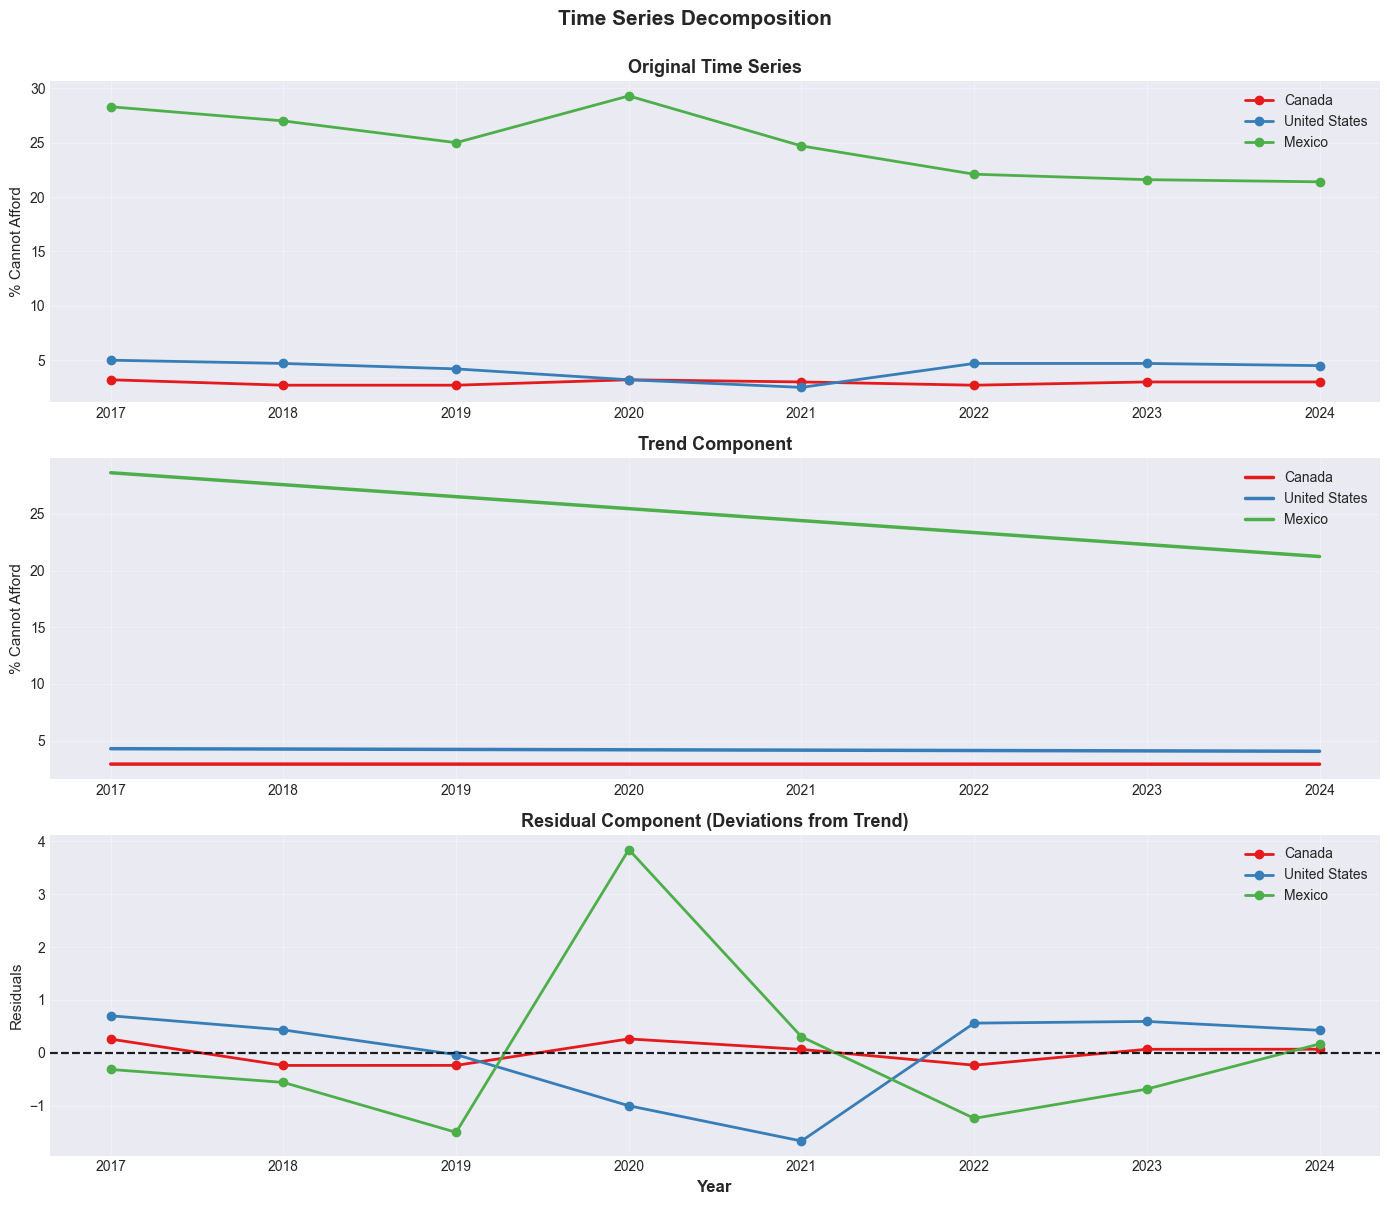

In [19]:
# Since we only have 8 years, we'll do a simple trend/residual decomposition
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for country in ['Canada', 'United States', 'Mexico']:
    country_data = df_na[df_na['Country'] == country].copy()
    
    # Original series
    axes[0].plot(country_data['Year'], 
                country_data['Cannot_Afford_Healthy_Diet_Pct'],
                marker='o', linewidth=2, label=country,
                color=colors[country])
    
    # Trend (linear regression)
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Cannot_Afford_Healthy_Diet_Pct'].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    axes[1].plot(country_data['Year'], trend, 
                linewidth=2.5, label=country,
                color=colors[country])
    
    # Residuals (deviations from trend)
    residuals = y - trend
    axes[2].plot(country_data['Year'], residuals,
                marker='o', linewidth=2, label=country,
                color=colors[country])
    axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)

axes[0].set_title('Original Time Series', fontsize=13, fontweight='bold')
axes[0].set_ylabel('% Cannot Afford', fontsize=11)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Trend Component', fontsize=13, fontweight='bold')
axes[1].set_ylabel('% Cannot Afford', fontsize=11)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

axes[2].set_title('Residual Component (Deviations from Trend)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residuals', fontsize=11)
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.suptitle('Time Series Decomposition', fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


Forecasted Values:

Canada:
  2025: 2.93%
  2026: 2.93%

United States:
  2025: 4.04%
  2026: 4.01%

Mexico:
  2025: 20.18%
  2026: 19.12%


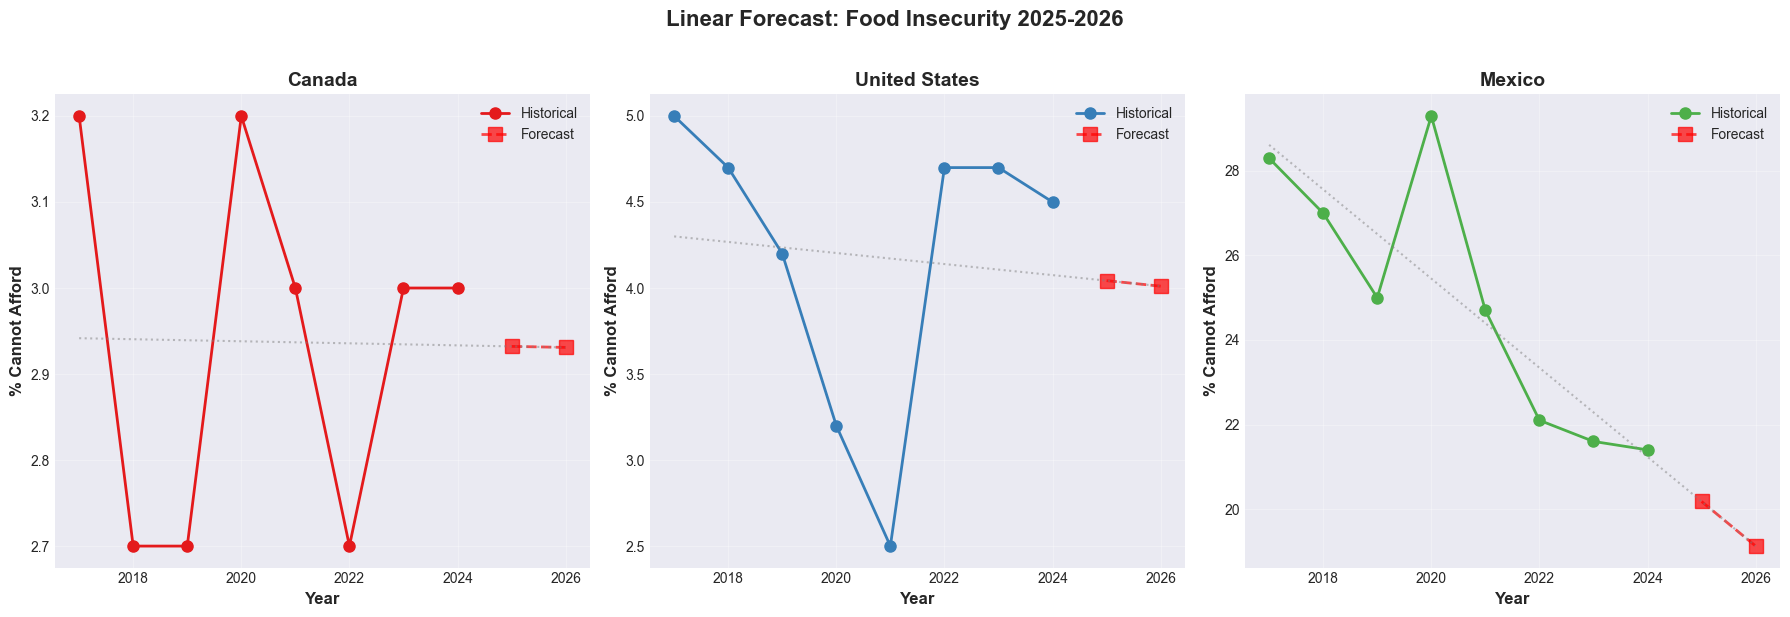

In [20]:
forecast_years = [2025, 2026]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

print("\nForecasted Values:")
for idx, country in enumerate(['Canada', 'United States', 'Mexico']):
    country_data = df_na[df_na['Country'] == country].copy()
    
    # Fit model on existing data
    X_train = country_data['Year'].values.reshape(-1, 1)
    y_train = country_data['Cannot_Afford_Healthy_Diet_Pct'].values
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict future
    X_forecast = np.array(list(country_data['Year'].values) + forecast_years).reshape(-1, 1)
    y_forecast = model.predict(X_forecast)
    
    # Plot
    axes[idx].plot(country_data['Year'], y_train, 
                  marker='o', linewidth=2, markersize=8, 
                  label='Historical', color=colors[country])
    axes[idx].plot(forecast_years, y_forecast[-2:], 
                  marker='s', linewidth=2, markersize=10, linestyle='--',
                  label='Forecast', color='red', alpha=0.7)
    
    # Add all trend line
    axes[idx].plot(X_forecast, y_forecast, 
                  linewidth=1.5, linestyle=':', 
                  color='gray', alpha=0.5)
    
    axes[idx].set_xlabel('Year', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('% Cannot Afford', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{country}', fontsize=14, fontweight='bold')
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    
    # Print forecasts
    print(f"\n{country}:")
    for year, value in zip(forecast_years, y_forecast[-2:]):
        print(f"  {year}: {value:.2f}%")

plt.suptitle('Linear Forecast: Food Insecurity 2025-2026', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


Country Rankings by Year (1 = Best, 3 = Worst):


Country,Canada,Mexico,United States
Year,,,
2017,1,3,2
2018,1,3,2
2019,1,3,2
2020,1,3,1
2021,2,3,1
2022,1,3,2
2023,1,3,2
2024,1,3,2


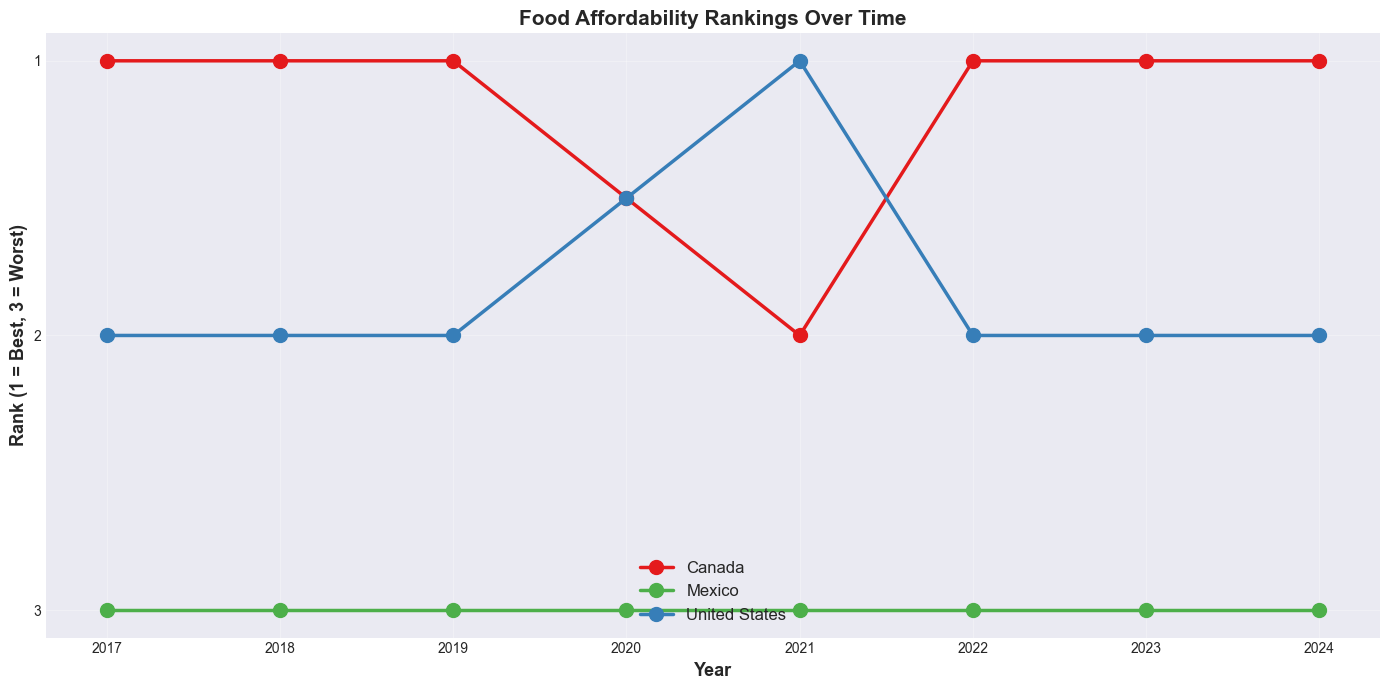


Ranking Summary:

Canada:
  Average rank: 1.19
  Best rank: 1 (in 2017)
  Worst rank: 2 (in 2021)

Mexico:
  Average rank: 3.00
  Best rank: 3 (in 2017)
  Worst rank: 3 (in 2017)

United States:
  Average rank: 1.81
  Best rank: 1 (in 2021)
  Worst rank: 2 (in 2017)


In [21]:
# Rank countries each year
df_rank = df_pivot.rank(axis=1, ascending=True)  # 1 = best (lowest %), 3 = worst (highest %)

print("\nCountry Rankings by Year (1 = Best, 3 = Worst):")
display(df_rank.astype(int))

# Visualize rankings over time
plt.figure(figsize=(14, 7))

for country in df_rank.columns:
    plt.plot(df_rank.index, df_rank[country], 
            marker='o', linewidth=2.5, markersize=10, 
            label=country, color=colors[country])

plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Rank (1 = Best, 3 = Worst)', fontsize=13, fontweight='bold')
plt.title('Food Affordability Rankings Over Time', fontsize=15, fontweight='bold')
plt.yticks([1, 2, 3])
plt.gca().invert_yaxis()  # Invert so 1 is at top
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary of rankings
print("\nRanking Summary:")
for country in df_rank.columns:
    avg_rank = df_rank[country].mean()
    best_year = df_rank[country].idxmin()
    worst_year = df_rank[country].idxmax()
    
    print(f"\n{country}:")
    print(f"  Average rank: {avg_rank:.2f}")
    print(f"  Best rank: {int(df_rank.loc[best_year, country])} (in {best_year})")
    print(f"  Worst rank: {int(df_rank.loc[worst_year, country])} (in {worst_year})")


In [22]:
summary_stats = pd.DataFrame({
    'Country': ['Canada', 'United States', 'Mexico'],
    'Mean_2017_2024': [df_pivot[c].mean() for c in df_pivot.columns],
    'Std_Dev': [df_pivot[c].std() for c in df_pivot.columns],
    'CV_%': [(df_pivot[c].std()/df_pivot[c].mean()*100) for c in df_pivot.columns],
    'Start_2017': [df_pivot.loc[2017, c] for c in df_pivot.columns],
    'End_2024': [df_pivot.loc[2024, c] for c in df_pivot.columns],
    'Total_Change': [df_pivot.loc[2024, c] - df_pivot.loc[2017, c] for c in df_pivot.columns],
    'Pct_Change': [((df_pivot.loc[2024, c] - df_pivot.loc[2017, c])/df_pivot.loc[2017, c]*100) for c in df_pivot.columns]
})

print("\nSummary Statistics Table:")
display(summary_stats.round(2))


Summary Statistics Table:


,Country,Mean_2017_2024,Std_Dev,CV_%,Start_2017,End_2024,Total_Change,Pct_Change
0,Canada,2.94,0.21,7.26,3.20,3.00,-0.20,-6.25
1,United States,24.92,3.08,12.35,28.30,21.40,-6.90,-24.38
2,Mexico,4.19,0.88,20.91,5.00,4.50,-0.50,-10.00
